In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
import numpy as np 
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from debris_cover_smb import glac_dyn, constants, geospatial

In [3]:
%cd /nobackup/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/BlackChangriNup/

/nobackupp11/sbhusha1/chapter2/HighresDebrisCover_SMB_Data/BlackChangriNup


In [4]:
dem1_fn = 'dem/20151102_0517_10400100125E8E00_10400100130D8500_align.tif'
dem2_fn = 'dem/20161025_0524_104001002469AD00_1040010024438E00-DEM_2m_align.tif'
vx_fn = 'SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif'
vy_fn = 'SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif'
H_fn_cn = constants.fetch_farinotti_thickness('changri_nup')
debris_thick_fn_cn = constants.fetch_rounce_debris_thickness('changri_nup')
debris_melt_enhancement_fn_cn = constants.fetch_rounce_debris_melt_enhancement('changri_nup')
glac_shp_fn = '/nobackup/sbhusha1/hma/agu22_scratch/Black_changri_with_accumulation_area2.shp'
glac_shp = gpd.read_file(glac_shp_fn)
!clip_raster_by_shp.py $debris_thick_fn_cn $glac_shp_fn
!clip_raster_by_shp.py $H_fn_cn $glac_shp_fn
!clip_raster_by_shp.py $debris_melt_enhancement_fn_cn $glac_shp_fn
H_fn = os.path.splitext(H_fn_cn)[0]+"_shpclip.tif"
debris_thick_fn = os.path.splitext(debris_thick_fn_cn)[0]+"_shpclip.tif"
debris_melt_enhancement_fn = os.path.splitext(debris_melt_enhancement_fn_cn)[0]+"_shpclip.tif"
out_identifier = 'black_changri_nup_farinotti'
lengthscale_factor = 5
num_thickness_divison = 20
smr_cutoff = 175
timescale = 'year'
writeout = True
saveplot = True
conserve_mass = False
outdir = 'SMB_data/'
smb_uncertainty_fn = 'SMB_data/black_changri_nup_farinotti_2015-11-02_to_2016-10-25_smb_dhdt_smb_propagated_uncertainty.tif'
icecliff_gpkg = 'SMB_data/black_changri_nup_edited.gpkg'


Raster to clip: /nobackupp11/sbhusha1/reference_data/debris_thickness/HMA_DTE_15.03734_hdts_m.tif
Shapefile used to clip: /nobackup/sbhusha1/hma/agu22_scratch/Black_changri_with_accumulation_area2.shp
nl: 205 ns: 236 res: 35.000
0...10...20...30...40...50...60...70...80...90...100 - done.
Input shp srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Specified output srs: +proj=tmerc +lat_0=0 +lon_0=86.807922363 +k=0.9996 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs
Raster to clip: /nobackupp11/sbhusha1/reference_data/farinotti_2019_ice_thickness/RGI60-15/RGI60-15.03734_thickness.tif
Shapefile used to clip: /nobackup/sbhusha1/hma/agu22_scratch/Black_changri_with_accumulation_area2.shp
nl: 211 ns: 255 res: 25.000
0...10...20...30...40...50...60...70...80...90...100 - done.
Raster to clip: /nobackupp11/sbhusha1/reference_data/debris_thickness/HMA_DTE_15.03734_meltfactor.tif
Shapefile used to clip: /nobackup/sbhusha1/hma/agu22_scratch/Black_changri_with_accumulation_area2.shp
nl: 205 ns

dt is 0.9801638907901742
******** Step 1: computing flux divergence *************

Warping all inputs to the following:
Resolution: 25.0
Extent: [476612.5, 3094162.5, 482987.5, 3099437.5]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: average

1 of 3: /nobackupp11/sbhusha1/reference_data/farinotti_2019_ice_thickness/RGI60-15/RGI60-15.03734_thickness_shpclip.tif
2 of 3: SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif
nl: 211 ns: 255 res: 25.000
0...10...20...30...40...50...60...70...80...90...3 of 3: SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif
nl: 211 ns: 255 res: 25.000
100 - done.
0...10...20...30...40...50...60...70...80...90...
Warping all inputs to the following:
Resolution: 25.0
Extent: [476612.5, 3094162.5, 482987.5, 3099437.5]
Projection: '+proj=utm 

/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


******** Step 4: Computing Elevation change due to surface melting: Continuity equation *****************
***** Analysis1: Computing SMR and locating hotspots*************
Using user provided ice-cliff location file, will not compute ice cliff in this run
***** Analysis2: Calcuating bin-wise melt stats *************


/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


************ Creating plots ****************
******** Creating spatial map figure ************
******** Creating melt curve ************
************ Saving files *******************


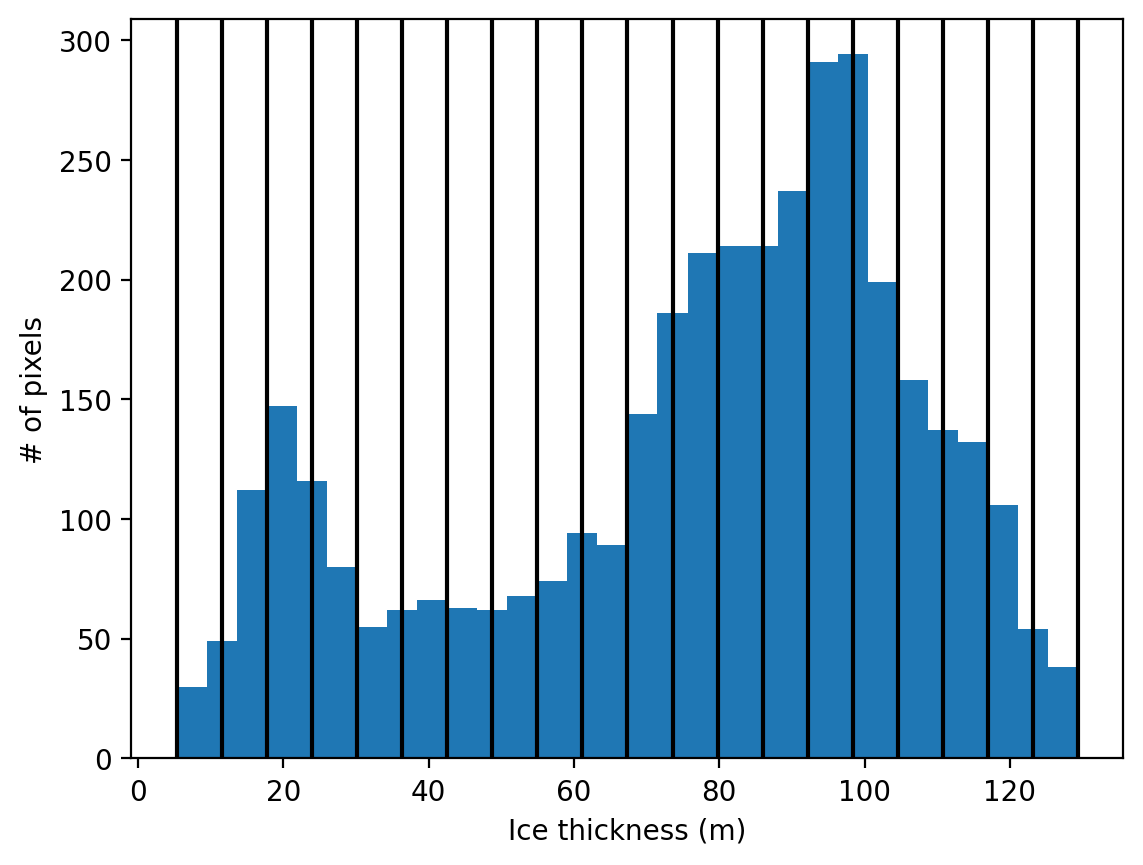

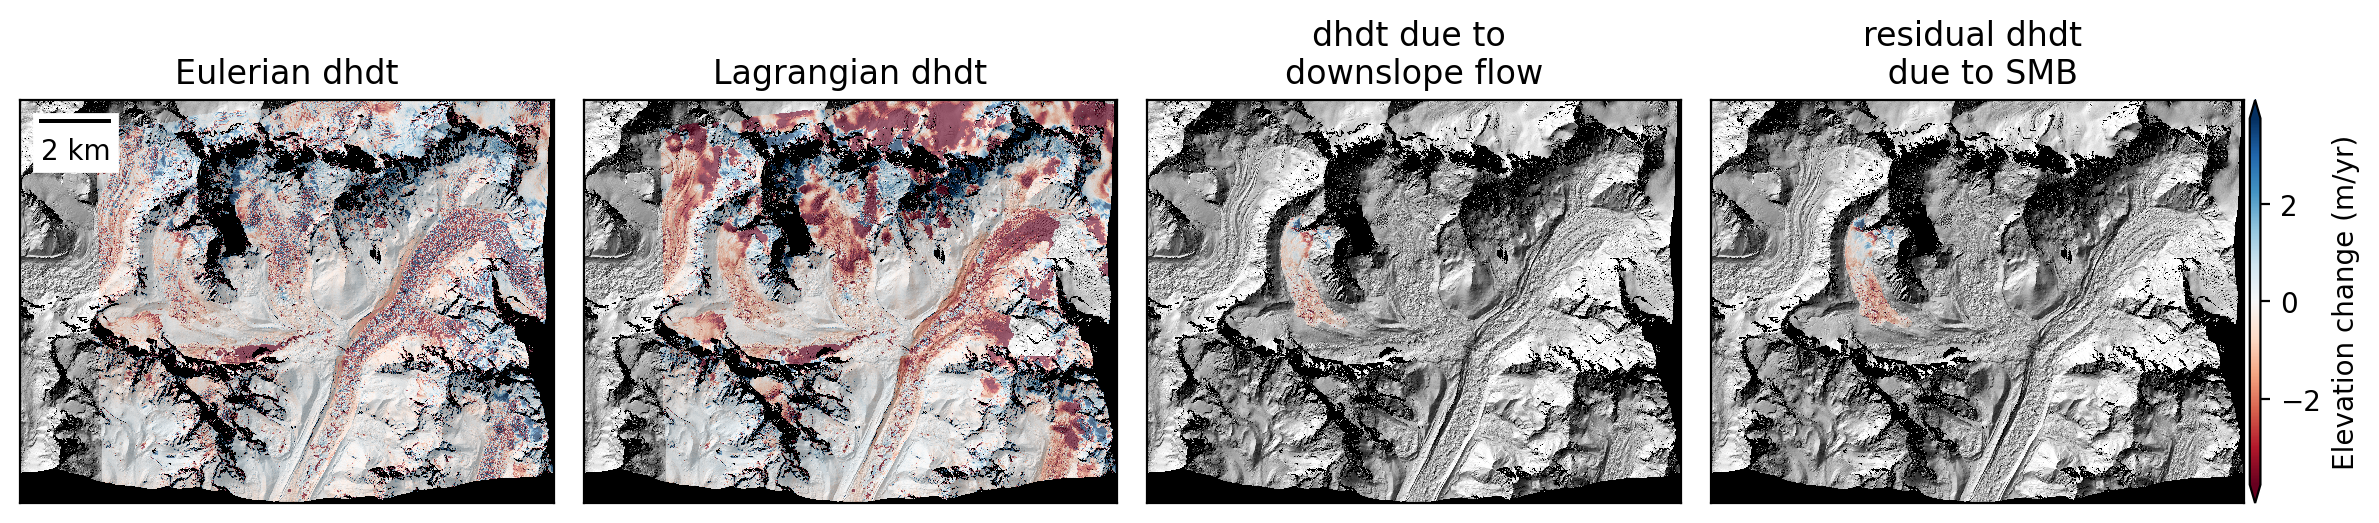

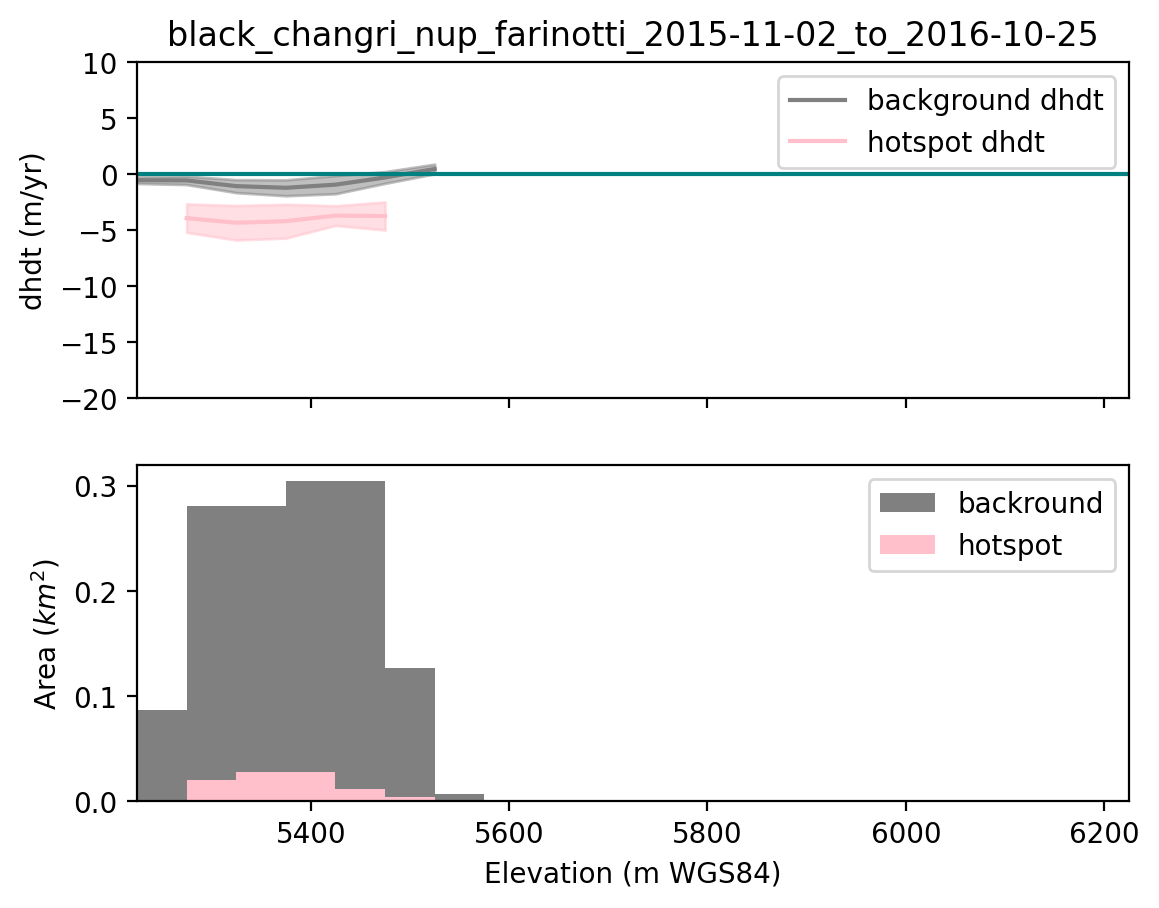

In [5]:
divQ2, euldhdt, lag_dhdt, downslope_dhdt, smb_dhdt,stats_df = glac_dyn.lag_smb_workflow(dem1_fn,dem2_fn,vx_fn,
                                                             vy_fn,H_fn,debris_thick_fn,debris_melt_enhancement_fn,glac_shp,out_identifier, lengthscale_factor,
                                                             num_thickness_divison,smr_cutoff,timescale,icecliff_gpkg,
                                                             writeout,saveplot,outdir,conserve_mass=conserve_mass,
                                                                                        smb_uncertainty_fn=smb_uncertainty_fn)

In [9]:
stats_df = pd.read_csv('SMB_data/black_changri_nup_farinotti_2015-11-02_to_2016-10-25_altitudnal_meltstats.csv')

In [11]:
stats_df.keys()

Index(['med_bg_dhdt', 'nmad_bg_dhdt', 'q1_bg_dhdt', 'q3_bg_dhdt', 'area_bg',
       'med_hotspot_dhdt', 'nmad_hotspot_dhdt', 'q1_hotspot_dhdt',
       'q3_hotspot_dhdt', 'area_hotspot', 'med_clean_dhdt', 'nmad_clean_dhdt',
       'q1_clean_dhdt', 'q3_clean_dhdt', 'area_clean', 'med_total_dhdt',
       'nmad_total_dhdt', 'q1_total_dhdt', 'q3_total_dhdt', 'area_total',
       'med_deb_thick', 'nmad_deb_thick', 'q1_deb_thick', 'q3_deb_thick',
       'med_deb_melt_enhancement', 'q1_deb_melt_enhancement',
       'q3_deb_melt_enhancemente ', 'med_vm', 'nmad_vm', 'q1_vm', 'q3_vm',
       'z_area', 'z_bin_centers', 'smb_error_mean', 'smb_error_med'],
      dtype='object')

In [12]:
stats_df[['med_total_dhdt','smb_error_med']]

,med_total_dhdt,smb_error_med
0,-0.52,0.51
1,-0.56,0.53
2,-1.12,0.56
3,-1.30,0.55
4,-1.03,0.64
5,-0.48,0.60
6,-0.37,0.66
7,0.10,0.75
8,-1.66,0.67
9,1.94,0.76


#### Flow correct orthoimage

In [15]:
ortho1_fn = 'orthoimage/aligned_images/20151102_10400100125E8E00_ortho_res_0.35m__shifted_to__20151102_0517_10400100125E8E00_10400100130D8500_align_hs.tif'
ortho2_fn = 'orthoimage/aligned_images/20161025_104001002469AD00_ortho_res_0.34m__shifted_to__20151102_10400100125E8E00_ortho_res_0.35m__shifted_to__20151102_0517_10400100125E8E00_10400100130D8500_align_hs.tif'
vx_fn = 'SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif'
vy_fn = 'SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif'
clip_fn = 'SMB_data/orthoimage_extent.geojson'
extent = gpd.read_file(clip_fn).to_crs('EPSG:32645')
proc_extent = extent.total_bounds
ds_list = warplib.memwarp_multi_fn([ortho2_fn,ortho1_fn,vx_fn,vy_fn],res='first',extent=proc_extent.tolist())


Warping all inputs to the following:
Resolution: 0.3399999999382999
Extent: [476656.401301338, 3093565.6189054972, 481086.9833781425, 3099303.331379873]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 4: orthoimage/aligned_images/20161025_104001002469AD00_ortho_res_0.34m__shifted_to__20151102_10400100125E8E00_ortho_res_0.35m__shifted_to__20151102_0517_10400100125E8E00_10400100130D8500_align_hs.tif
nl: 16876 ns: 13031 res: 0.340
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 4: orthoimage/aligned_images/20151102_10400100125E8E00_ortho_res_0.35m__shifted_to__20151102_0517_10400100125E8E00_10400100130D8500_align_hs.tif
nl: 16876 ns: 13031 res: 0.340
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 4: SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif
nl: 16876 ns: 13031 res: 0.340
100 - done.
0...10...20...30...40..

In [16]:
ortho2,ortho1,vx,vy = [iolib.ds_getma(ds) for ds in ds_list]


In [17]:
dt = timelib.get_t_factor_fn(dem1_fn,dem2_fn)

In [18]:
_,ortho2_shifted = glac_dyn.compute_lagrangian(ortho1.astype(np.float32),ortho2.astype(np.float32),vx,vy,dt,
                                               annual=True,res=geolib.get_res(ds_list[0])[0],startofpath=True,return_shifted_dem=True)

/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


In [19]:
outfn = os.path.splitext(ortho2_fn)[0]+"_flow_corrected.tif"
iolib.writeGTiff(ortho2_shifted,outfn,src_ds=ds_list[0])

In [20]:
dem1_fn = 'dem/20151102_0517_10400100125E8E00_10400100130D8500_align.tif'
dem2_fn = 'dem/20161025_0524_104001002469AD00_1040010024438E00-DEM_2m_align.tif'
vx_fn = 'SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif'
vy_fn = 'SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif'
clip_fn = 'SMB_data/orthoimage_extent.geojson'
extent = gpd.read_file(clip_fn).to_crs('EPSG:32645')
proc_extent = extent.total_bounds
ds_list = warplib.memwarp_multi_fn([dem2_fn,dem1_fn,vx_fn,vy_fn],res='first',extent=proc_extent.tolist())


Warping all inputs to the following:
Resolution: 2.0
Extent: [476656.401301338, 3093565.6189054972, 481086.9833781425, 3099303.331379873]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 4: dem/20161025_0524_104001002469AD00_1040010024438E00-DEM_2m_align.tif
nl: 2869 ns: 2215 res: 2.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 4: dem/20161025_0524_104001002469AD00_1040010024438E00-DEM_2m_align.tif
nl: 2869 ns: 2215 res: 2.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 4: SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif
nl: 2869 ns: 2215 res: 2.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 4: SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif
nl: 2869 ns: 2215 res: 2.000
100 - done.
0

In [21]:
dem2,dem1,vx,vy = [iolib.ds_getma(ds) for ds in ds_list]

_,dem2_shifted = glac_dyn.compute_lagrangian(dem1,dem2,vx,vy,dt,
                                               annual=True,res=geolib.get_res(ds_list[0])[0],startofpath=True,return_shifted_dem=True)

/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


In [22]:
outfn = os.path.splitext(dem2_fn)[0]+"_flow_corrected.tif"
iolib.writeGTiff(dem2_shifted,outfn,src_ds=ds_list[0])

## OLD and exploratory

In [5]:
gdf = gpd.read_file('/nobackup/sbhusha1/chapter2/changrinup/20230217/black_changri_nup_2015-11-02_to_2016-10-25_lag_smb_products/black_changri_nup_2015-11-02_to_2016-10-25_hotspot_location.gpkg')

In [8]:
gdf.area.sum()/1e6

0.071496

In [9]:
gdf1 = gpd.read_file('/nobackup/sbhusha1/chapter2/changrinup/20230217/black_changri_nup_2015-11-02_to_2016-10-25_lag_smb_products/black_changri_nup_edited.gpkg')

In [11]:
gdf1.area.sum()/1e6

0.069488

## Sensitivity testing

In [9]:
divQ2.shape

(5200, 6885)

In [10]:
lag_dhdt.shape

(5200, 6885)

In [14]:
ds_list_highres = warplib.memwarp_multi_fn([dem1_fn,dem2_fn,vx_fn,vy_fn],extent='first',r='cubicspline')
dem1,dem2,vx,vy = [iolib.ds_getma(ds) for ds in ds_list_highres]
fluxdiv_outfn = 'SMB_data/black_changri_nup_2015-11-02_to_2016-10-25_divQ2.tif'
downslope_outfn = 'SMB_data/black_changri_nup_2015-11-02_to_2016-10-25_downslope_dhdt.tif'
H,divQ2,debris_ma,debris_melt_enhancement_ma,downslope_dhdt = [iolib.ds_getma(ds) for ds in warplib.memwarp_multi(ds_list_highres+[iolib.fn_getds(fn) for fn in [H_fn,fluxdiv_outfn,debris_thick_fn,debris_melt_enhancement_fn,downslope_outfn]],
                                                                                   res='first',r='cubic',extent='first')[-5:]]


Warping all inputs to the following:
Resolution: 2.0
Extent: [474665.0, 3090517.0, 488435.0, 3100917.0]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubicspline

1 of 4: dem/20151102_0517_10400100125E8E00_10400100130D8500_align.tif
2 of 4: dem/20161025_0524_104001002469AD00_1040010024438E00-DEM_2m_align.tif
nl: 5200 ns: 6885 res: 2.000
..100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 4: SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip_b1.tif
nl: 5200 ns: 6885 res: 2.000
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 4: SMB_data/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip_b1.tif
nl: 5200 ns: 6885 res: 2.000
100 - done.
0...10...20...30...40...50...60...70...80...90...
Warping all inputs to the following:
Resolution: 2.0
Extent: [474665.0, 30

In [36]:
dt = timelib.get_t_factor_fn(dem1_fn,dem2_fn)

lag_dhdt,dem2_flow_corrected = glac_dyn.compute_lagrangian(dem1,dem2,vx,vy,dt,return_shifted_dem=True)
dem1_fill = glac_dyn.inpaint_fill(dem1,filllimit=100)
dem2_fill = glac_dyn.inpaint_fill(dem2_flow_corrected,filllimit=100)

slope1 = geolib.gdaldem_mem_ma(dem1_fill,ds_list_highres[0],processing='slope',
    returnma=True,computeEdges=True)
slope2 = geolib.gdaldem_mem_ma(dem2_fill,ds_list_highres[1],processing='slope',
    returnma=True,computeEdges=True)

#hotspot_binary_gdf = find_melthotspot(slope1,slope2,lag_dhdt-downslope_dhdt,ds=ds_list_highres[1],
#   debris_cover_area=debris_ma,fill_final_mask=True,dhdt_sobelcutoff=0.60,return_sobel_layer=False,erode_iteration=1)





/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


In [23]:
hotspot_binary_gdf_2_5 = glac_dyn.high_slope_high_melt(slope1,slope2,lag_dhdt-downslope_dhdt,ds=ds_list_highres[1],
    debris_cover_area=debris_ma,dhdt_cutoff=-2.5,min_pixel_count=15)

In [24]:
hotspot_binary_gdf_1_5 = glac_dyn.high_slope_high_melt(slope1,slope2,lag_dhdt-downslope_dhdt,ds=ds_list_highres[1],
    debris_cover_area=debris_ma,dhdt_cutoff=-1.5,min_pixel_count=15)

In [25]:
hotspot_binary_gdf_1_0 = glac_dyn.high_slope_high_melt(slope1,slope2,lag_dhdt-downslope_dhdt,ds=ds_list_highres[1],
    debris_cover_area=debris_ma,dhdt_cutoff=-1.0,min_pixel_count=15)

In [26]:
hotspot_binary_gdf_2_0 = glac_dyn.high_slope_high_melt(slope1,slope2,lag_dhdt-downslope_dhdt,ds=ds_list_highres[1],
    debris_cover_area=debris_ma,dhdt_cutoff=-2.0,min_pixel_count=15)

In [65]:
hotspot_binary_gdf_3_0 = glac_dyn.high_slope_high_melt(slope1,slope2,lag_dhdt-downslope_dhdt,ds=ds_list_highres[1],
    debris_cover_area=debris_ma,dhdt_cutoff=-3.0,min_pixel_count=15)
hotspot_binary_gdf_3_5 = glac_dyn.high_slope_high_melt(slope1,slope2,lag_dhdt-downslope_dhdt,ds=ds_list_highres[1],
    debris_cover_area=debris_ma,dhdt_cutoff=-3.5,min_pixel_count=15)

In [33]:
base_elevation = np.ma.array(dem1,mask=np.ma.getmask(H))
max_smb = 12
smb_clean = np.ma.masked_greater_equal(smb_dhdt,max_smb)
vm = np.ma.sqrt(vx**2+vy**2)
vm = np.ma.array(np.ma.sqrt(vx**2+vy**2),mask=np.ma.getmask(H))
def compute_stats_df(debris_ma,glac_shp,hotspot_binary_gdf,smb_clean,ds_list_highres,debris_melt_enhancement_ma,vm,base_elevation):
    debris_temp = np.ma.array(np.ma.ones(debris_ma.shape),mask=np.ma.getmask(debris_ma),dtype=np.int16)
    debris_shp = glac_dyn.binary2shapefile(debris_temp,1,ds=ds_list_highres[2])
    ice_shp = glac_shp.overlay(debris_shp,how='difference') # this is all bare ice
    background_shp = debris_shp.overlay(hotspot_binary_gdf,how='difference') # this is all background debris
    background_smb_dhdt = geospatial.mask_by_shp(background_shp.geometry,smb_clean,ds=ds_list_highres[1])
    hotspot_smb_dhdt = geospatial.mask_by_shp(hotspot_binary_gdf.geometry,smb_clean,ds=ds_list_highres[1])
    clean_ice_dhdt = geospatial.mask_by_shp(ice_shp.geometry,smb_clean,ds=ds_list_highres[1])
    stats_df = glac_dyn.hist_plot_gmbtools(hotspot_smb_dhdt,background_smb_dhdt,clean_ice_dhdt,smb_clean,debris_ma,debris_melt_enhancement_ma,vm,base_elevation,ds_list_highres[0])
    return stats_df

In [37]:
stats_df_2_5 = compute_stats_df(debris_ma,glac_shp,hotspot_binary_gdf_2_5,smb_clean,ds_list_highres,debris_melt_enhancement_ma,vm,base_elevation) 

/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


In [39]:
stats_df_2_0 = compute_stats_df(debris_ma,glac_shp,hotspot_binary_gdf_2_0,smb_clean,ds_list_highres,debris_melt_enhancement_ma,vm,base_elevation) 

/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


In [40]:
stats_df_1_5 = compute_stats_df(debris_ma,glac_shp,hotspot_binary_gdf_1_5,smb_clean,ds_list_highres,debris_melt_enhancement_ma,vm,base_elevation) 

/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


In [41]:
stats_df_1_0 = compute_stats_df(debris_ma,glac_shp,hotspot_binary_gdf_1_0,smb_clean,ds_list_highres,debris_melt_enhancement_ma,vm,base_elevation)

/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


In [66]:
stats_df_3_0 = compute_stats_df(debris_ma,glac_shp,hotspot_binary_gdf_3_0,smb_clean,ds_list_highres,debris_melt_enhancement_ma,vm,base_elevation)
stats_df_3_5 = compute_stats_df(debris_ma,glac_shp,hotspot_binary_gdf_3_5,smb_clean,ds_list_highres,debris_melt_enhancement_ma,vm,base_elevation)

/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/swbuild/sbhusha1/conda/install/envs/bhushangdal3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


In [44]:
stats_df_2_5

,med_bg_dhdt,nmad_bg_dhdt,q1_bg_dhdt,q3_bg_dhdt,area_bg,med_hotspot_dhdt,nmad_hotspot_dhdt,q1_hotspot_dhdt,q3_hotspot_dhdt,area_hotspot,...,nmad_deb_thick,q1_deb_thick,q3_deb_thick,med_deb_melt_enhancement,med_vm,nmad_vm,q1_vm,q3_vm,z_area,z_bin_centers
0,-0.53,0.29,-0.725823,-0.325968,0.002040,NaN,NaN,NaN,NaN,0.000000,...,0.01,0.033578,0.048350,0.04,0.62,0.02,0.599673,0.635180,0.007408,5225.0
1,-0.55,0.37,-0.871522,-0.326767,0.087280,-3.92,1.28,-4.888027,-3.195491,0.001708,...,0.03,0.026797,0.072347,0.05,0.63,0.08,0.565734,0.678472,0.110312,5275.0
2,-1.06,0.57,-1.436642,-0.661027,0.281240,-4.32,1.53,-5.966667,-3.496823,0.020520,...,0.03,0.056359,0.103797,0.07,0.91,0.40,0.693965,1.290330,0.343896,5325.0
3,-1.21,0.71,-1.673210,-0.717825,0.269536,-4.21,1.50,-5.780744,-3.382578,0.028384,...,0.07,0.100120,0.211496,0.14,2.89,1.78,1.246363,3.686233,0.309472,5375.0
4,-0.93,0.80,-1.532787,-0.442182,0.302604,-3.70,0.84,-4.531953,-3.257001,0.013616,...,0.10,0.095886,0.231316,0.15,4.92,2.49,2.835582,6.328859,0.356512,5425.0
5,-0.29,0.52,-0.678516,0.033364,0.126460,-3.71,1.24,-4.816837,-2.974271,0.004380,...,0.10,0.082211,0.223408,0.16,7.39,2.17,6.203705,8.944293,0.270560,5475.0
6,0.47,0.43,0.191624,0.764440,0.007488,NaN,NaN,NaN,NaN,0.000000,...,0.13,0.172886,0.384788,0.26,7.67,1.82,5.966393,8.785974,0.334464,5525.0
7,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,6.80,2.41,5.040551,8.272571,0.260728,5575.0
8,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,10.50,7.21,3.037287,13.568718,0.077908,5625.0
9,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,8.94,7.60,5.488814,16.002311,0.071856,5675.0


In [67]:
stats_df_3_5 = melt_summary_function(stats_df_3_5)
stats_df_3_0 = melt_summary_function(stats_df_3_0)
stats_df_2_5 = melt_summary_function(stats_df_2_5)
stats_df_2_0 = melt_summary_function(stats_df_2_0)
stats_df_1_5 = melt_summary_function(stats_df_1_5)
stats_df_1_0 = melt_summary_function(stats_df_1_0)

In [48]:
glacier_wide_ice_cliff_melt_contribution(stats_df_1_0)

49.89883219512847

In [49]:
glacier_wide_ice_cliff_melt_contribution(stats_df_1_5)

33.53092167505249

In [50]:
glacier_wide_ice_cliff_melt_contribution(stats_df_2_0)

26.65176654271159

In [51]:
glacier_wide_ice_cliff_melt_contribution(stats_df_2_5)

22.13108105562277

In [68]:
glacier_wide_ice_cliff_melt_contribution(stats_df_3_0)

18.656265887037275

In [69]:
glacier_wide_ice_cliff_melt_contribution(stats_df_3_5)

15.953844056436992

In [55]:
%matplotlib inline

In [58]:
ds_extent = geolib.ds_extent(ds_list_highres[0])
fig_extent = [ds_extent[0],ds_extent[2],ds_extent[1],ds_extent[3]]
contour_extent = [fig_extent[0],fig_extent[1],fig_extent[3],fig_extent[2]] # flip y axis otherwise contours are plotted flipped

<Axes: >

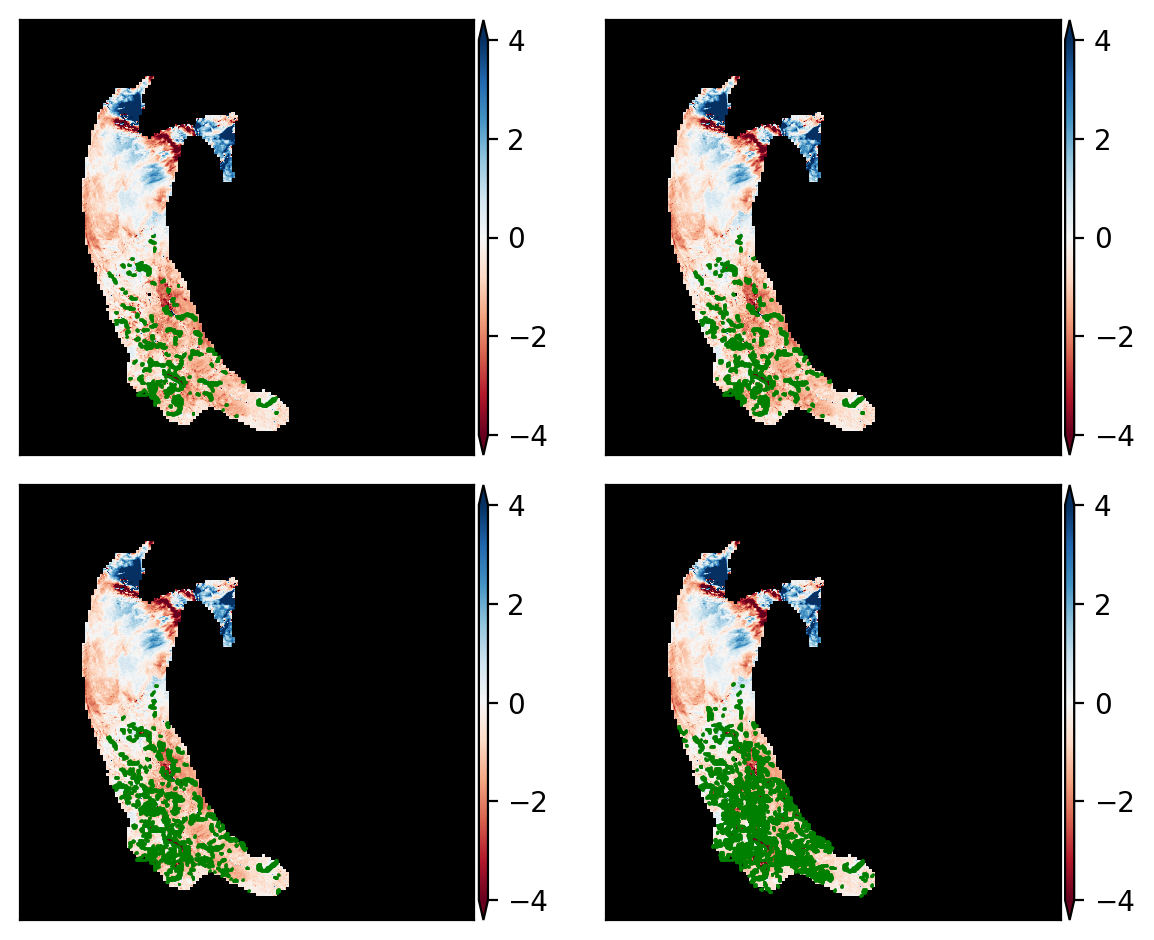

In [62]:
f,ax = plt.subplots(2,2,sharex=True,sharey=True)
lw = 1

for axa in ax.ravel():
    pltlib.iv(smb_dhdt,ax=axa,cmap='RdBu',clim = (-4,4),extent=fig_extent)
    axa.set_xlim(477599.7040301451, 481379.6298482157)
    axa.set_ylim(3094811.880500241, 3098430.95841116)
axa = ax.ravel()
hotspot_binary_gdf_2_5.plot(ax=axa[0],facecolor='None',edgecolor='green',linewidth=lw)
hotspot_binary_gdf_2_0.plot(ax=axa[1],facecolor='None',edgecolor='green',linewidth=lw)
hotspot_binary_gdf_1_5.plot(ax=axa[2],facecolor='None',edgecolor='green',linewidth=lw)
hotspot_binary_gdf_1_0.plot(ax=axa[3],facecolor='None',edgecolor='green',linewidth=lw)


In [63]:
%matplotlib widget

In [ ]:
f,ax = plt.subplots(2,2,sharex=True,sharey=True)
lw = 1

for axa in ax.ravel():
    pltlib.iv(smb_dhdt,ax=axa,cmap='RdBu',clim = (-4,4),extent=fig_extent)
    axa.set_xlim(477599.7040301451, 481379.6298482157)
    axa.set_ylim(3094811.880500241, 3098430.95841116)
axa = ax.ravel()
hotspot_binary_gdf_2_5.plot(ax=axa[0],facecolor='None',edgecolor='green',linewidth=lw)
hotspot_binary_gdf_2_0.plot(ax=axa[1],facecolor='None',edgecolor='green',linewidth=lw)
hotspot_binary_gdf_1_5.plot(ax=axa[2],facecolor='None',edgecolor='green',linewidth=lw)
hotspot_binary_gdf_1_0.plot(ax=axa[3],facecolor='None',edgecolor='green',linewidth=lw)


<Axes: >

### Functions

In [46]:
def melt_summary_function(melt_df):
    
    mask = melt_df['med_bg_dhdt'] > 0
    enhancement_factor = melt_df['med_hotspot_dhdt']/melt_df['med_bg_dhdt']
    #melt_debris_total = ((melt_df['med_bg_dhdt'] * melt_df['area_bg']) + (melt_df['med_hotspot_dhdt'] * melt_df['area_hotspot']))/(melt_df['area_bg'] + melt_df['area_hotspot'])
    #melt_by_icecliff = melt_debris_total-melt_df['med_bg_dhdt']
    #melt_contribution = melt_by_icecliff/(melt_debris_total)
    melt_contribution2 = (melt_df['med_hotspot_dhdt']*melt_df['area_hotspot'])/((melt_df['med_hotspot_dhdt']*melt_df['area_hotspot'])+(melt_df['med_bg_dhdt']*melt_df['area_bg']))
    ice_cliff_area = ((melt_df.area_hotspot)/(melt_df.area_bg+melt_df.area_hotspot))*100
    # create mask to restrict analysis to bins where debris is also melting
    #melt_contribution[mask] = np.nan
    enhancement_factor[mask] = np.nan
    melt_contribution2[mask] = np.nan
    #ice_cliff_area[mask] = np.nan
    #melt_df['melt_debris_total'] = melt_debris_total
    melt_df['ice_cliff_area_perc'] = ice_cliff_area
    #melt_df['ice_cliff_melt_contribution'] = melt_contribution * 100
    melt_df['ice_cliff_melt_contribution2'] = melt_contribution2 * 100
    melt_df['ice_cliff_enhancement_factor'] = enhancement_factor 
    
    return melt_df
def glacier_wide_ice_cliff_melt_contribution(df):
    total_debris_melt = (((df['med_hotspot_dhdt']*df['area_hotspot']) + (df['med_bg_dhdt']*df['area_bg']))).sum()
    
    icecliff_melt = (df['med_hotspot_dhdt']*df['area_hotspot']).sum()
    #total_glacier_bg_melt = (df['med_bg_dhdt']*df['area_bg']).sum()/(df['area_bg'].sum())
    return (icecliff_melt/total_debris_melt)*100

def glacier_wide_ice_cliff_enhancement(df):
    area_wt_mean_cliff_melt = ((df['med_hotspot_dhdt']*df['area_hotspot']).sum())/(df['area_hotspot'].sum())
    area_wt_mean_debris_melt = ((df['med_bg_dhdt']*df['area_bg']).sum())/(df['area_bg'].sum())
    glacierwide_icecliff_debris_enhancement = area_wt_mean_cliff_melt/area_wt_mean_debris_melt
    #total_glacier_bg_melt = (df['med_bg_dhdt']*df['area_bg']).sum()/(df['area_bg'].sum())
    return glacierwide_icecliff_debris_enhancement


## Old data

In [8]:


divQ2, euldhdt, lag_dhdt, downslope_dhdt, smb_dhdt,stats_df = glac_dyn.lag_smb_workflow(dem1,dem2,vx_fn,
                                                             vy_fn,H_fn,debris_thick_fn,glac_shp,out_identifier, lengthscale_factor,
                                                             num_thickness_divison,smr_cutoff,timescale,icecliff_gpkg=icecliff_gpkg)

NameError: name 'dem1' is not defined

In [8]:
%matplotlib widget

In [22]:
glac_shp

'/nobackup/sbhusha1/hma/agu22_scratch/Black_changri_with_accumulation_area2.shp'

In [24]:
f,ax = plt.subplots()
pltlib.iv_fn(debris_thick_fn,
          ax=ax,cmap='RdBu',clim=(-3,3),full=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/nobackupp16/swbuild3/sbhusha1/pip_git_sw/imview/imview/lib/pltlib.py:155: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu").copy()
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

In [17]:
f,ax = plt.subplots()
pltlib.iv_fn('black_changri_nup_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/black_changri_nup_farinotti_2015-11-02_to_2016-10-25_divQ2.tif',
          ax=ax,cmap='RdBu',clim=(-3,3),full=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/nobackupp16/swbuild3/sbhusha1/pip_git_sw/imview/imview/lib/pltlib.py:155: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu").copy()
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

In [16]:
f,ax = plt.subplots()
pltlib.iv_fn('black_changri_nup_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/black_changri_nup_farinotti_2015-11-02_to_2016-10-25_smb_dhdt.tif',
          ax=ax,cmap='RdBu',clim=(-3,3),full=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/nobackupp16/swbuild3/sbhusha1/pip_git_sw/imview/imview/lib/pltlib.py:155: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu").copy()
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>